In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import gif

In [2]:
PATH1 = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/flat_bandresults/CNT_flatband_sc_selfv_offdiag_epsR1_n76/'
PATH = '/home/dleonard/Documents/QuaTrEx/quatrex/results/72CNT_flatband_sc_selfv_offdiag_epsR1_n64/'

In [25]:
DOS_TEST = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
E = np.loadtxt(PATH + 'E.dat')
x = np.arange(12)

EE, X = np.meshgrid(E, x)

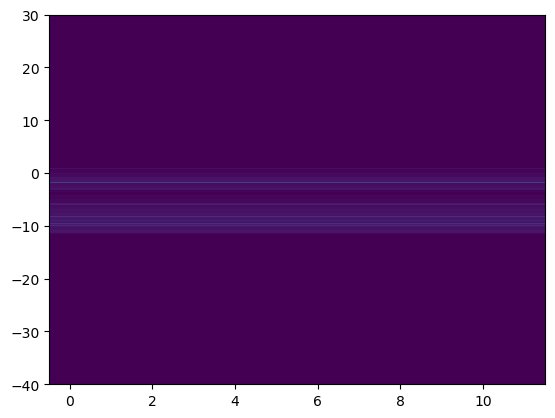

In [6]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [7]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [3]:
@gif.frame
def plot_gold(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((20))
    Efr_dotted = EFR[i+1] * np.ones((20))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 175)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00-0.40, EFL[i+1] + 0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(11.55-0.90, EFR[i+1] + 0.05, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-4.8,  -1.3)

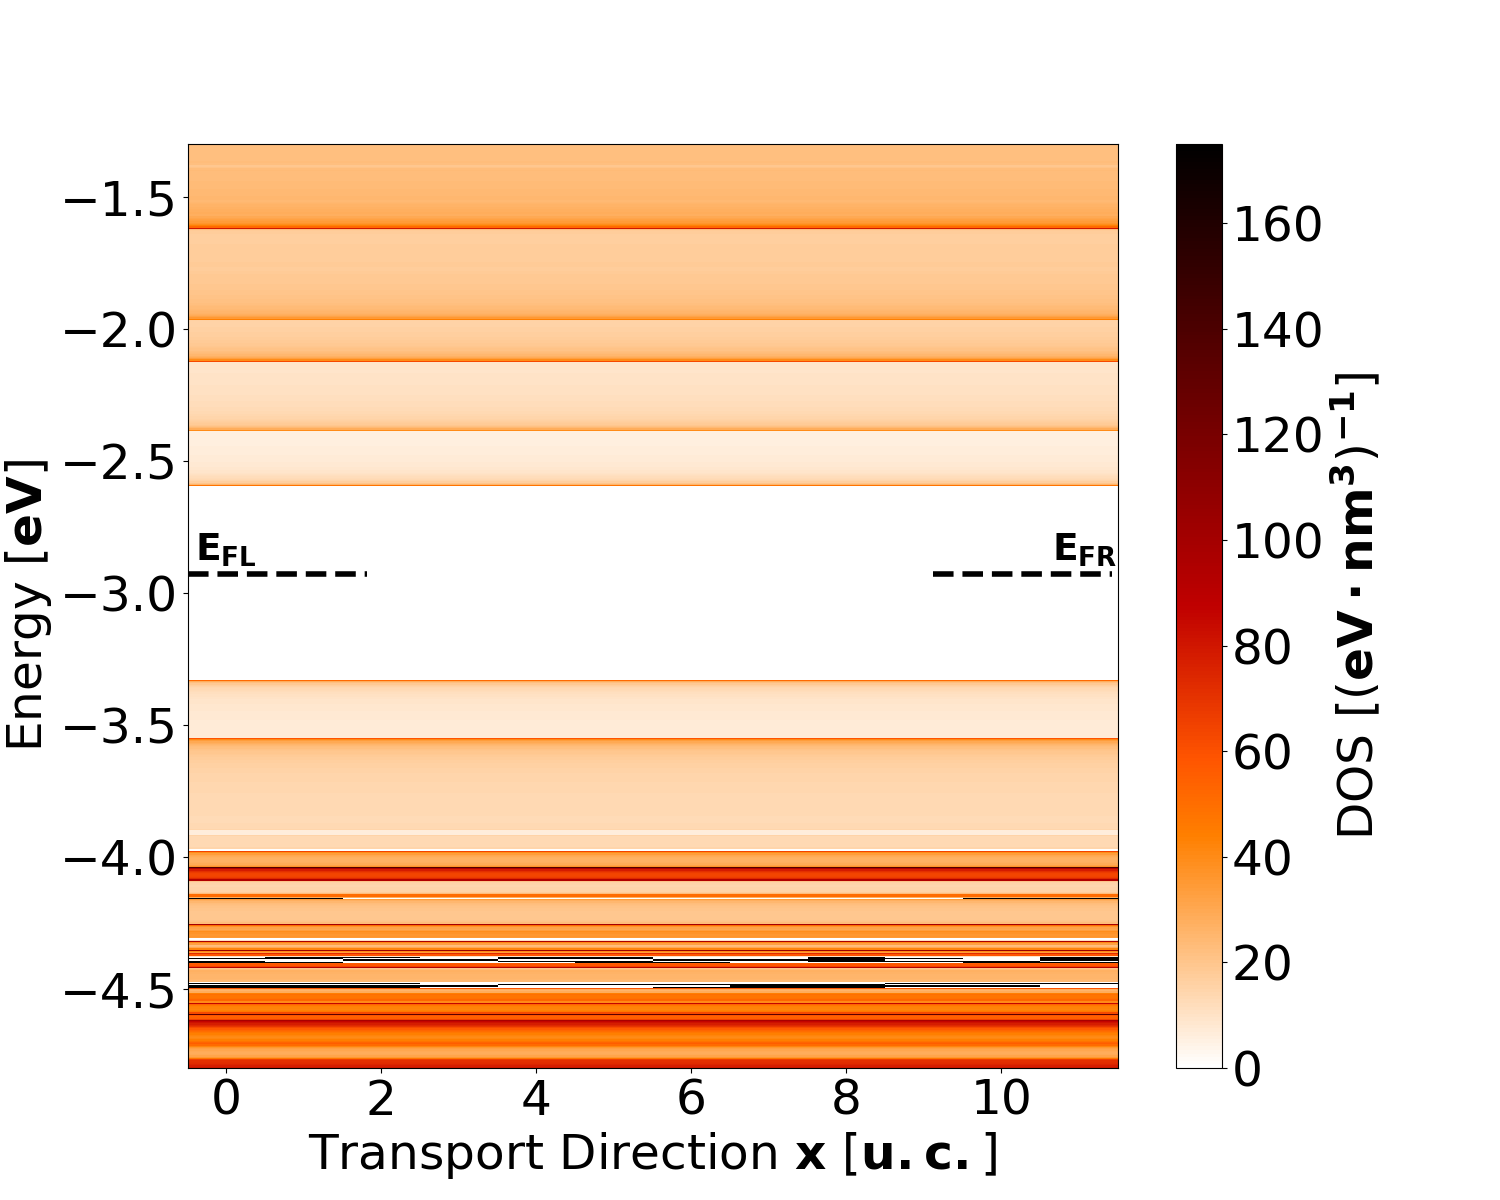

In [4]:
plot_gold(PATH, 99)

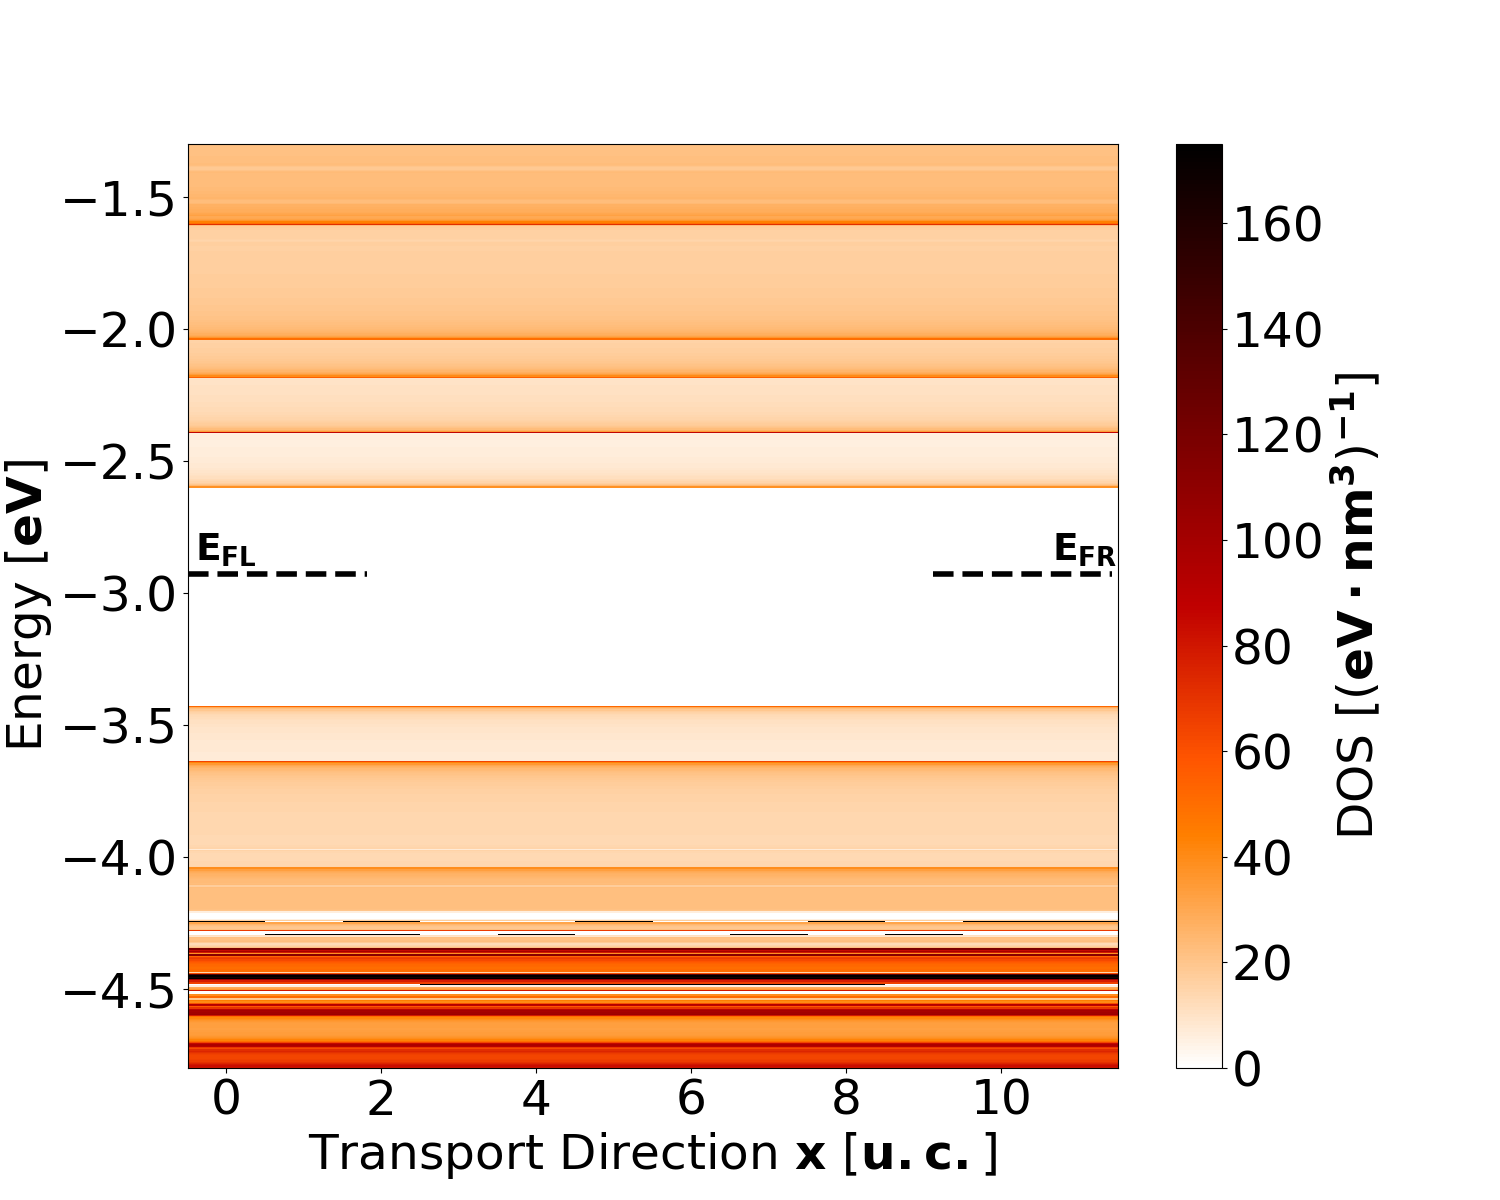

In [5]:
plot_gold(PATH1, 99)

In [20]:
def plot_line(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[0,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[0,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #plt.plot(E, DOS_TEST.T.real[0,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 250
    NE = E.shape[0]
    print(EFL[i+1])
    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(-y_lim, y_lim + 2)
    plt.xlim(-30, 10)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

-3.7203736430228753


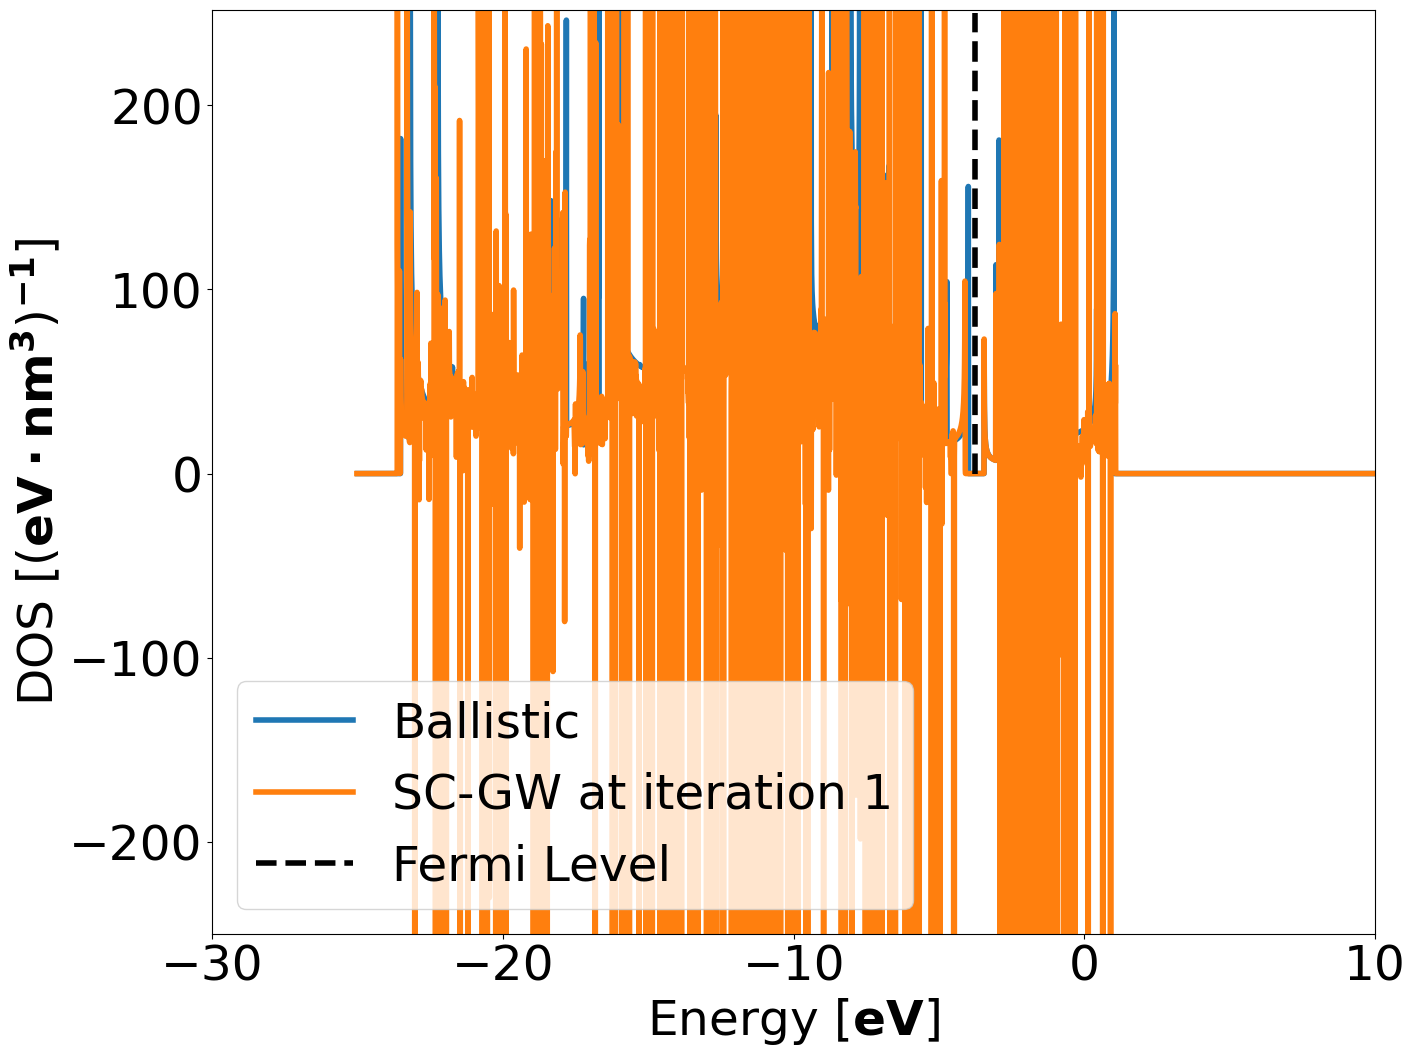

In [25]:
plot_line(PATH, 1)

-2.8675704271724243


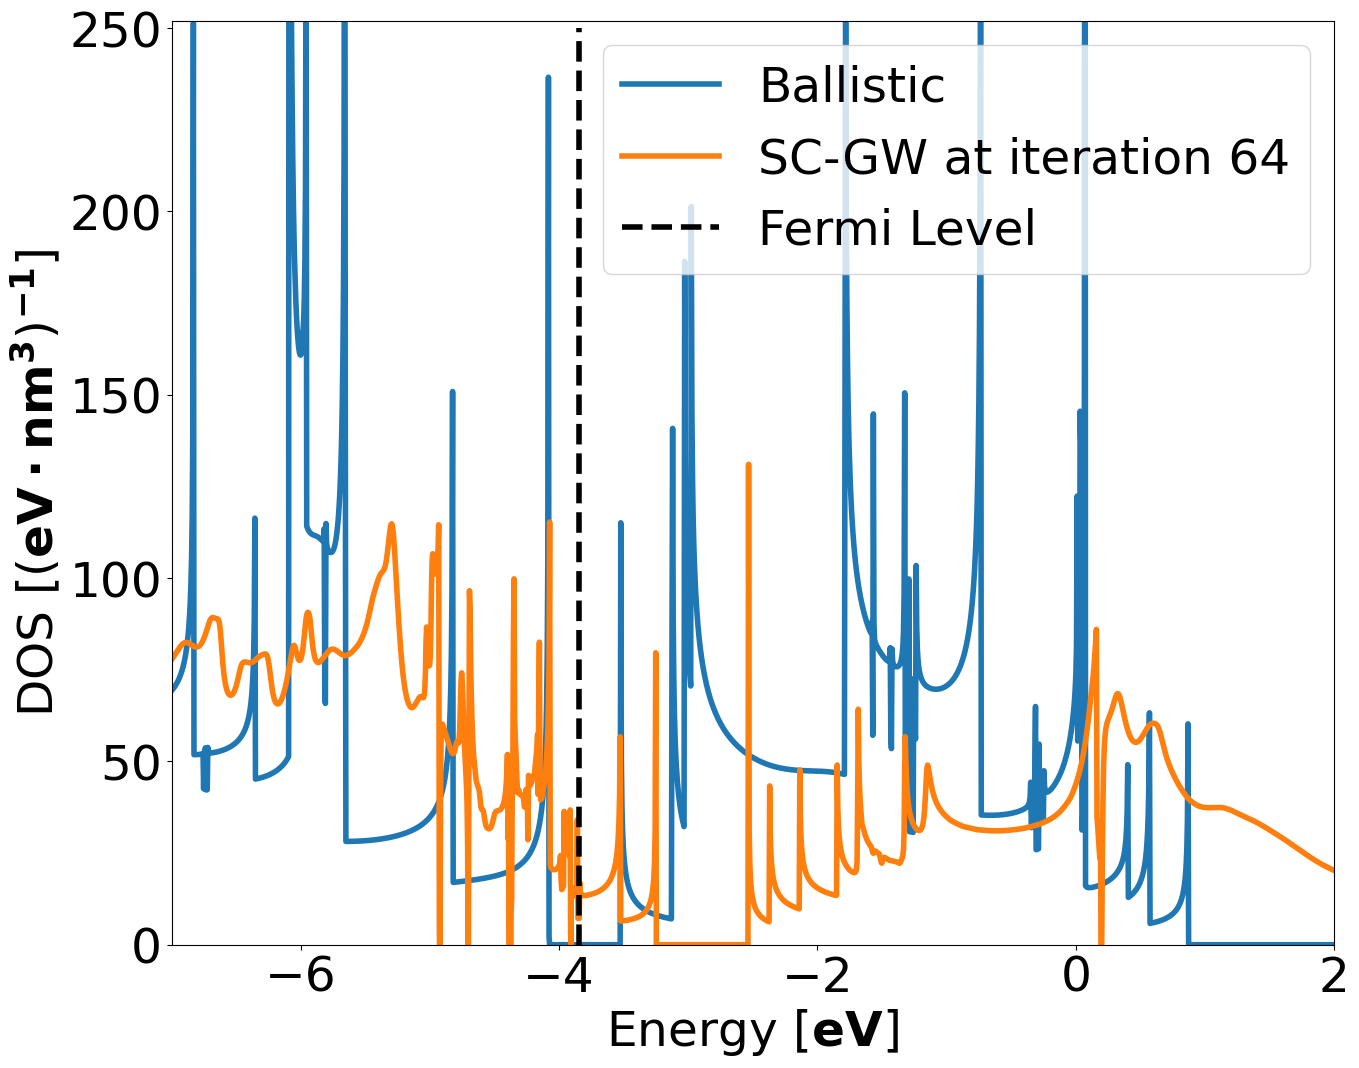

In [55]:
plot_line(PATH, 64)

In [5]:
def plot_line_compare(PATHs, legends, linestyles,  iters):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)

    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)

    y_lim = 80
    
    plt.ylim(0, y_lim + 2)
    plt.xlim(-4.5, -2.5)

    for path, legend, linestyle, i  in zip(PATHs, legends, linestyles, iters):    
        DOS_ZERO = np.loadtxt(path + 'DOS_0.dat').view(complex)
        DOS_TEST = np.loadtxt(path + 'DOS_' + str(i) + '.dat').view(complex)
        E = np.loadtxt(path + 'E.dat')
        EFL = np.loadtxt(path + 'EFL.dat')
        EFR = np.loadtxt(path + 'EFR.dat')
        shift = EFL[i+1] - EFL[0]
        plt.plot(E-shift, DOS_TEST.T.real[0,:], linewidth = 4, label = legend, linestyle = linestyle)


    plot = plt.plot(E, DOS_ZERO.T.real[0,:], linewidth = 4, label = "Ballistic")
    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')


    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

In [6]:
Paths = ['/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/flat_bandresults/CNT_flatband_sc_selfv_offdiag_epsR1_n52/'
        ,'/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/flat_bandresults/CNT_flatband_sc_selfv_offdiag_epsR1_n64/'
         ,'/home/dleonard/Documents/QuaTrEx/quatrex/results/CNT_flatband_sc_selfv_offdiag_epsR1_n70/']

legends = ['n52', 'n64', 'n70']

linestyles = ['solid', 'dashed', 'dashdot']

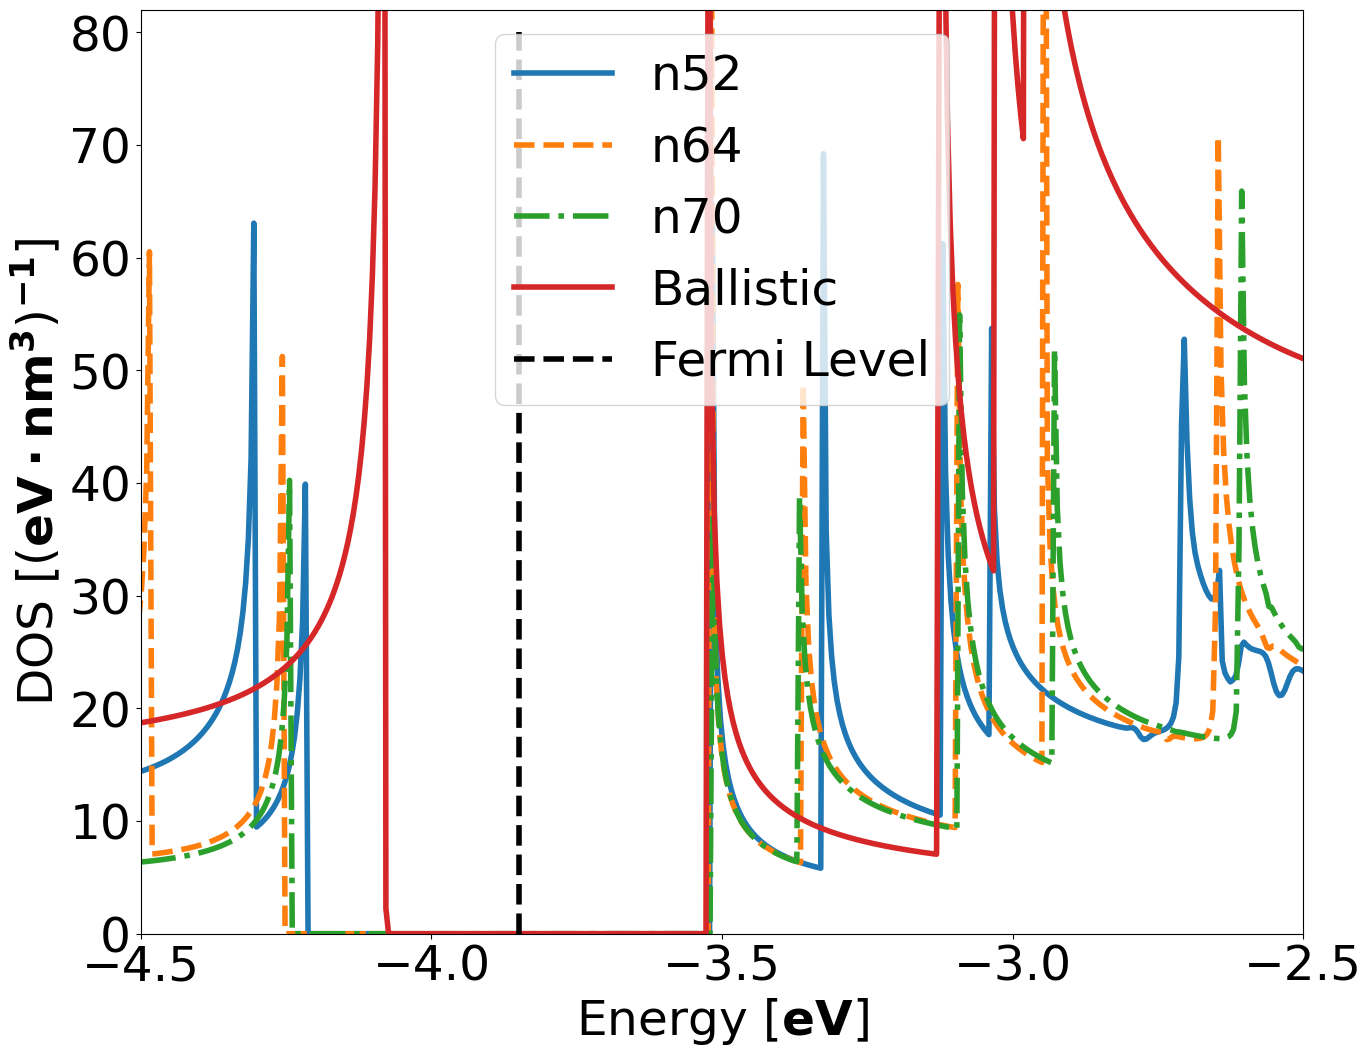

In [9]:
plot_line_compare(Paths, legends, linestyles, [99, 99, 149])